# Global Power Plant project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

As we can see there are many null values present in the dataset, so we will drop the unnecessary columns

In [5]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017","generation_gwh_2019",
        "generation_data_source", "estimated_generation_gwh","country", "country_long",
         "year_of_capacity_data", "name", "gppd_idnr", "url"], axis=1, inplace=True)

In [6]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,7279.000000
...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN
904,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN


In [7]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2018'],
      dtype='object')

In [8]:
df.shape

(907, 8)

In [9]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2018    459
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   527 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   888 non-null    object 
 7   generation_gwh_2018  448 non-null    float64
dtypes: float64(5), object(3)
memory usage: 56.8+ KB


In [11]:
# filling missing data for continous values with mean
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)
df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].mean(),inplace=True)
                    
# filling missing data for categorical values with mode
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

In [12]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2018    0
dtype: int64

# Data Visualization

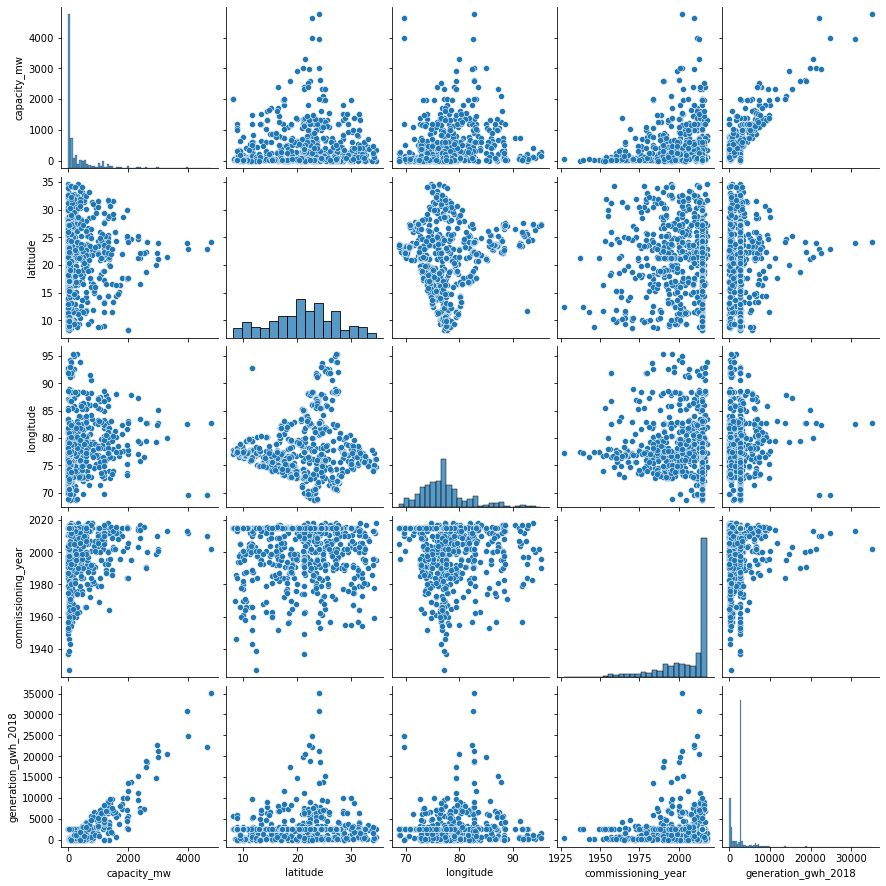

In [19]:
sns.pairplot(df)

capacity_mw               AxesSubplot(0.125,0.125;0.133621x0.755)
latitude               AxesSubplot(0.285345,0.125;0.133621x0.755)
longitude               AxesSubplot(0.44569,0.125;0.133621x0.755)
commissioning_year     AxesSubplot(0.606034,0.125;0.133621x0.755)
generation_gwh_2018    AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

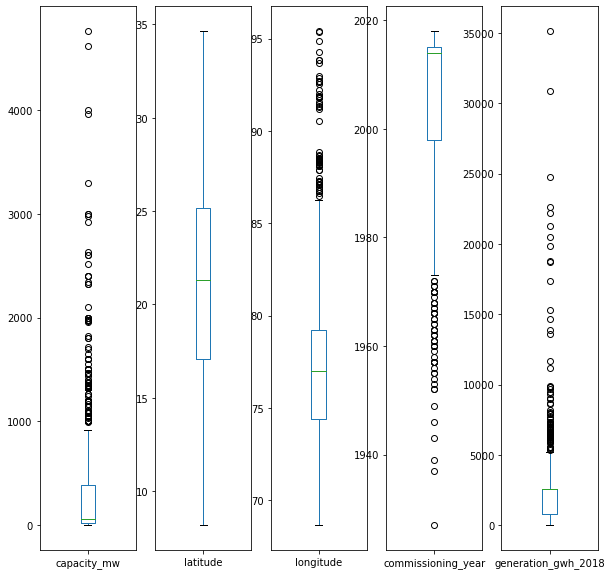

In [21]:
df.plot(kind='box', subplots=True, figsize=(10,10))

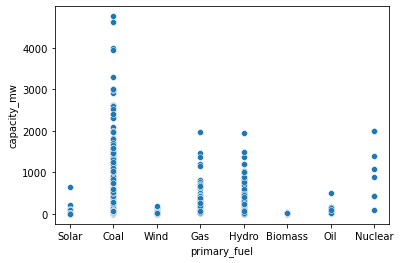

In [26]:
sns.scatterplot(data = df,x = "primary_fuel", y = "capacity_mw")
plt.show()

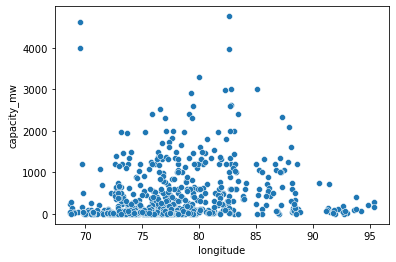

In [27]:
sns.scatterplot(data=df, x = "longitude", y = "capacity_mw")
plt.show()

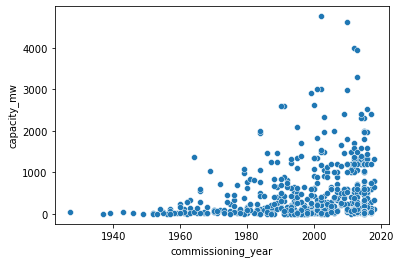

In [25]:
sns.scatterplot(data=df,x = "commissioning_year", y = "capacity_mw")
plt.show()

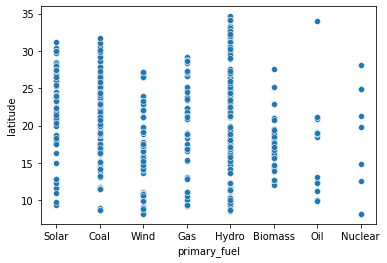

In [30]:
sns.scatterplot(data=df,x = "primary_fuel", y = "latitude")
plt.show()

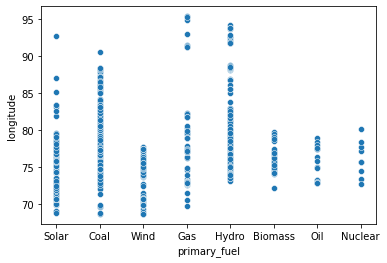

In [31]:
sns.scatterplot(data=df,x = "primary_fuel", y = "longitude")
plt.show()

In [43]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])

In [48]:
df['geolocation_source'] = le.fit_transform(df['geolocation_source'])
df['source'] = le.fit_transform(df['source'])

In [49]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,geolocation_source\t
0,2.5,28.1839,73.2407,6,2011.0,109,1,2600.804099,1
1,98.0,24.7663,74.6090,1,2015.0,174,2,2600.804099,2
2,39.2,21.9038,69.3732,7,2015.0,21,2,2600.804099,2
3,135.0,23.8712,91.3602,2,2004.0,22,2,626.239128,2
4,1800.0,21.9603,82.4091,1,2015.0,22,2,7279.000000,2


# Checking correlation

In [51]:
dff=df.corr()
dff

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,geolocation_source\t
capacity_mw,1.000000,0.050984,0.195882,-0.380395,-0.004072,-2.421218e-01,2.048653e-01,7.734556e-01,2.048653e-01
latitude,0.050984,1.000000,0.036362,-0.010204,0.034519,5.592656e-02,-1.842751e-01,3.132625e-02,-1.842751e-01
longitude,0.195882,0.036362,1.000000,-0.347948,-0.159025,-2.393334e-01,2.523426e-01,3.777965e-02,2.523426e-01
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,0.164947,5.361263e-02,-4.832168e-01,-1.369831e-01,-4.832168e-01
commissioning_year,-0.004072,0.034519,-0.159025,0.164947,1.000000,3.222222e-01,-2.599290e-01,1.442491e-01,-2.599290e-01
source,-0.242122,0.055927,-0.239333,0.053613,0.322222,1.000000e+00,-5.057202e-01,1.092118e-17,-5.057202e-01
geolocation_source,0.204865,-0.184275,0.252343,-0.483217,-0.259929,-5.057202e-01,1.000000e+00,-1.048582e-17,1.000000e+00
generation_gwh_2018,0.773456,0.031326,0.037780,-0.136983,0.144249,1.092118e-17,-1.048582e-17,1.000000e+00,3.362799e-19
geolocation_source\t,0.204865,-0.184275,0.252343,-0.483217,-0.259929,-5.057202e-01,1.000000e+00,3.362799e-19,1.000000e+00


<AxesSubplot:>

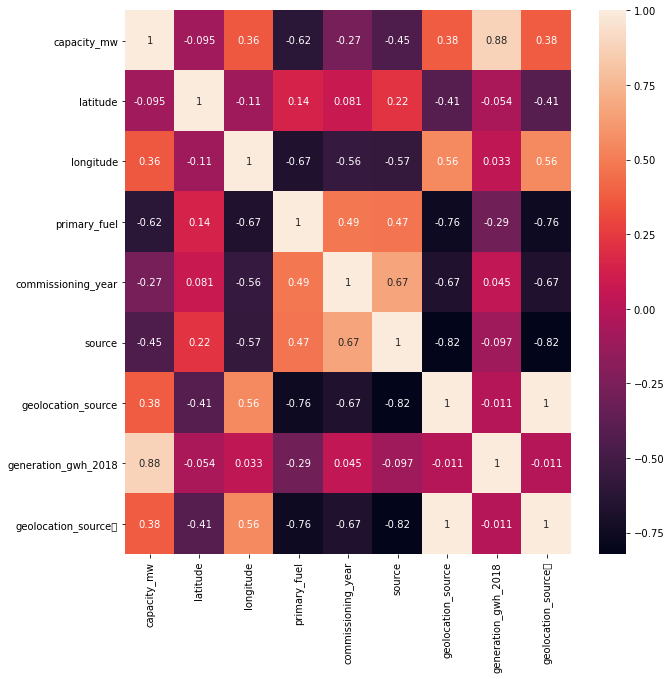

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(dff.corr(), annot=True)

In [57]:
#removing outliers
from scipy.stats import zscore
z= np.abs(zscore(df))
z

array([[5.48907549e-01, 1.14980517e+00, 8.78279731e-01, ...,
        1.08334929e+00, 1.50124402e-16, 1.08334929e+00],
       [3.86977292e-01, 5.87310989e-01, 5.93788441e-01, ...,
        3.94241396e-01, 1.50124402e-16, 3.94241396e-01],
       [4.86678853e-01, 1.16179322e-01, 1.68239437e+00, ...,
        3.94241396e-01, 1.50124402e-16, 3.94241396e-01],
       ...,
       [5.09908639e-01, 9.74706510e-01, 3.91673420e-01, ...,
        3.94241396e-01, 1.50124402e-16, 3.94241396e-01],
       [4.17498178e-01, 5.18793221e-01, 7.72866383e-01, ...,
        3.94241396e-01, 1.50124402e-16, 3.94241396e-01],
       [5.25169082e-01, 1.85383409e+00, 2.47270171e-03, ...,
        3.94241396e-01, 1.50124402e-16, 3.94241396e-01]])

In [58]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  71,  80, 143, 143, 147, 179, 183, 191, 209, 209, 222,
       244, 299, 308, 308, 321, 323, 333, 340, 342, 345, 360, 363, 364,
       364, 371, 375, 416, 427, 444, 454, 478, 482, 484, 493, 493, 494,
       494, 499, 519, 538, 541, 546, 573, 577, 583, 601, 621, 638, 648,
       648, 657, 657, 661, 669, 689, 695, 695, 706, 709, 721, 724, 726,
       726, 728, 767, 786, 786, 788, 807, 808, 808, 818, 832, 847, 848,
       870, 871, 879, 880, 880, 895, 900], dtype=int64), array([0, 7, 5, 5, 0, 7, 0, 2, 2, 5, 0, 7, 4, 2, 5, 0, 7, 5, 2, 2, 2, 4,
       5, 2, 0, 0, 7, 4, 0, 2, 2, 4, 4, 4, 0, 4, 0, 7, 0, 7, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 2, 0, 7, 0, 7, 5, 5, 5, 0, 7, 4, 4, 7, 7, 0, 7,
       4, 0, 0, 7, 0, 4, 0, 7, 2, 5, 2, 4, 5, 5, 5, 0, 7, 5, 5],
      dtype=int64))


In [59]:
df1=df[(z<3).all(axis=1)]
df1

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,geolocation_source\t
0,2.5,28.1839,73.2407,6,2011.0,109,1,2600.804099,1
1,98.0,24.7663,74.6090,1,2015.0,174,2,2600.804099,2
2,39.2,21.9038,69.3732,7,2015.0,21,2,2600.804099,2
3,135.0,23.8712,91.3602,2,2004.0,22,2,626.239128,2
4,1800.0,21.9603,82.4091,1,2015.0,22,2,7279.000000,2
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,22,2,686.500000,2
903,3.0,12.8932,78.1654,6,2015.0,77,0,2600.804099,0
904,25.5,15.2758,75.5811,7,2015.0,21,2,2600.804099,2
905,80.0,24.3500,73.7477,1,2015.0,59,2,2600.804099,2


In [61]:
df.shape

(907, 9)

In [62]:
df1.shape

(836, 9)

# Checking for skewness in the data

In [63]:
df.skew()

capacity_mw             3.123576
latitude               -0.149698
longitude               1.141881
primary_fuel            0.472251
commissioning_year     -1.714873
source                  1.827373
geolocation_source     -2.159841
generation_gwh_2018     4.937907
geolocation_source\t   -2.159841
dtype: float64

In [79]:
log=np.sqrt(df['capacity_mw'])
log.skew()

1.4729533880952714

In [73]:
log=np.log(df['longitude'])
log.skew()

0.9331113531357077

In [76]:
log=np.sqrt(df['generation_gwh_2018'])
log.skew()

0.9081289207609068

In [82]:
log=np.sqrt(df['geolocation_source\t'])
log.skew()

-2.176472854950349

In [85]:
log=np.sqrt(df['source'])
log.skew()

1.5063679911995103

In [88]:
log=np.log(df['commissioning_year'])
log.skew()

-1.734977353520199

In [91]:
x = df.drop('primary_fuel', axis=1)
y = df['primary_fuel']

In [92]:
y.value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [96]:
# adding samples to make all the categorical label values same
from imblearn.over_sampling import SMOTE

os = SMOTE()
x,y  = os.fit_resample(x, y)

In [97]:
y.value_counts()

0    258
2    258
4    258
6    258
1    258
3    258
5    258
7    258
Name: primary_fuel, dtype: int64

In [98]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2018,geolocation_source\t
0,-0.571441,1.470599,-0.828108,0.388339,1.254922,-1.174991,0.079582,-1.174991
1,-0.393624,0.870108,-0.497186,0.691439,2.631349,0.371681,0.079582,0.371681
2,-0.503107,0.367151,-1.763460,0.691439,-0.608548,0.371681,0.079582,0.371681
3,-0.324731,0.712834,3.554080,-0.142086,-0.587372,0.371681,-0.743169,0.371681
4,2.775433,0.377078,1.389263,0.691439,-0.587372,0.371681,2.028868,0.371681


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [101]:
max_accuracy=0
max_randomstate=0
for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=i)
    lr= LogisticRegression()
    lr.fit(x_train, y_train)
    predrf= lr.predict(x_test)
    acc= accuracy_score(y_test, predrf)
    if acc>max_accuracy:
        max_accuracy=acc
        max_randomstate=i
print('Best accuracy is', max_accuracy,'on random_state', max_randomstate)

Best accuracy is 0.559322033898305 on random_state 346


In [102]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.20, random_state=346)

# Logistic Regression

In [105]:
lr= LogisticRegression()
lr.fit(x_train, y_train)
predlr= lr.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.559322033898305
[[37  0  0  0  0  0 10 13]
 [ 3 24  7  1  9  3  4  2]
 [ 2  3 20  7  2 10  2  1]
 [ 0  2  6 11  0 15  0 16]
 [ 0 16 13  1 16  1  0  0]
 [ 2  0  1  0  0 41  8  1]
 [10  0  0  0  0  3 28  6]
 [ 0  0  0  2  0  0  0 54]]
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        60
           1       0.53      0.45      0.49        53
           2       0.43      0.43      0.43        47
           3       0.50      0.22      0.31        50
           4       0.59      0.34      0.43        47
           5       0.56      0.77      0.65        53
           6       0.54      0.60      0.57        47
           7       0.58      0.96      0.72        56

    accuracy                           0.56       413
   macro avg       0.55      0.55      0.53       413
weighted avg       0.56      0.56      0.54       413



# Decision Tree Classifier

In [106]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)
preddtc= dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.8983050847457628
[[59  0  1  0  0  0  0  0]
 [ 1 39  6  5  2  0  0  0]
 [ 0  4 37  4  2  0  0  0]
 [ 0  4  4 39  3  0  0  0]
 [ 0  1  0  0 45  1  0  0]
 [ 0  0  2  0  0 51  0  0]
 [ 1  0  1  0  0  0 45  0]
 [ 0  0  0  0  0  0  0 56]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        60
           1       0.81      0.74      0.77        53
           2       0.73      0.79      0.76        47
           3       0.81      0.78      0.80        50
           4       0.87      0.96      0.91        47
           5       0.98      0.96      0.97        53
           6       1.00      0.96      0.98        47
           7       1.00      1.00      1.00        56

    accuracy                           0.90       413
   macro avg       0.90      0.90      0.89       413
weighted avg       0.90      0.90      0.90       413



# Random Forest Classifier

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
predrf= rf.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

0.9394673123486683
[[60  0  0  0  0  0  0  0]
 [ 1 46  1  3  2  0  0  0]
 [ 0  3 38  3  2  1  0  0]
 [ 0  1  3 45  1  0  0  0]
 [ 0  0  1  0 45  1  0  0]
 [ 0  0  1  0  0 52  0  0]
 [ 0  1  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 56]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.90      0.87      0.88        53
           2       0.86      0.81      0.84        47
           3       0.88      0.90      0.89        50
           4       0.90      0.96      0.93        47
           5       0.96      0.98      0.97        53
           6       1.00      0.98      0.99        47
           7       1.00      1.00      1.00        56

    accuracy                           0.94       413
   macro avg       0.94      0.94      0.94       413
weighted avg       0.94      0.94      0.94       413



# Support Vector Classifier

In [108]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.35108958837772397
[[ 0  0  0  0  0  0 60  0]
 [ 0 18  4  1 14  5 11  0]
 [ 0  2 16  3  2 15  9  0]
 [ 0  3 10  4  0 17 16  0]
 [ 0  9 11  0 24  3  0  0]
 [ 0  0  0  0  0 36 17  0]
 [ 0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  0 56  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.56      0.34      0.42        53
           2       0.39      0.34      0.36        47
           3       0.50      0.08      0.14        50
           4       0.60      0.51      0.55        47
           5       0.47      0.68      0.56        53
           6       0.22      1.00      0.36        47
           7       0.00      0.00      0.00        56

    accuracy                           0.35       413
   macro avg       0.34      0.37      0.30       413
weighted avg       0.33      0.35      0.29       413



# KNeighbors Classifier

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train, y_train)
predknc= knc.predict(x_test)
print(accuracy_score(y_test, predknc))
print(confusion_matrix(y_test, predknc))
print(classification_report(y_test, predknc))

0.7723970944309927
[[57  0  2  0  0  0  1  0]
 [ 2 27  5  2 10  4  2  1]
 [ 0  3 32  3  3  4  2  0]
 [ 0  2 13 32  3  0  0  0]
 [ 0  6  5  5 30  1  0  0]
 [ 2  0  4  0  0 45  1  1]
 [ 4  0  1  0  0  1 40  1]
 [ 0  0  0  0  0  0  0 56]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        60
           1       0.71      0.51      0.59        53
           2       0.52      0.68      0.59        47
           3       0.76      0.64      0.70        50
           4       0.65      0.64      0.65        47
           5       0.82      0.85      0.83        53
           6       0.87      0.85      0.86        47
           7       0.95      1.00      0.97        56

    accuracy                           0.77       413
   macro avg       0.77      0.76      0.76       413
weighted avg       0.78      0.77      0.77       413



# Hyper Parameter Tuning

In [110]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCV
parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth': [4,5,6,7,8],
            'criterion': ['gini','entropy']}

In [111]:
gsv= GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
gsv.fit(x_train, y_train)  #fitting the data in model
gsv.best_params_ #printing the best parameters found by GridSearchCV

{'criterion': 'gini', 'max_depth' :7, 'max_features': 'sqrt'}

gsv_pred=gsv.best_estimator_.predict(x_test)   #predicting with best parameters
accuracy_score(y_test, gsv_pred)   #checking final accuracy

0.9225181598062954

# ROC AUC Plot

In [112]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [113]:
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(x_train, y_train)
pred = clf.predict(x_test)[]
pred_prob = clf.predict_proba(x_test)

In [114]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

In [122]:
n_class = 8

In [123]:
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

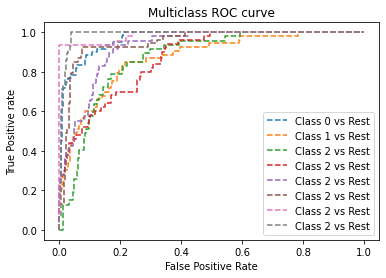

In [125]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=800)

# Saving the model in pickle format

In [128]:
import joblib
joblib.dump(gsv.best_estimator_,'global_power_plant.pkl')

['global_power_plant.pkl']

# For capacity_mw prediction :

In [129]:
X = df.drop('capacity_mw', axis=1)
Y = df['capacity_mw']

In [131]:
sts = StandardScaler()
X = pd.DataFrame(sts.fit_transform(X), columns=X.columns)
X.head()

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,geolocation_source\t
0,1.149805,-0.878280,1.225688,0.407327,1.460215,-1.083349,4.828255e-17,-1.083349
1,0.587311,-0.593788,-0.967877,0.661679,2.917019,0.394241,4.828255e-17,0.394241
2,0.116179,-1.682394,1.664401,0.661679,-0.512075,0.394241,4.828255e-17,0.394241
3,0.439989,2.889052,-0.529164,-0.037788,-0.489662,0.394241,-6.518573e-01,0.394241
4,0.125479,1.027976,-0.967877,0.661679,-0.489662,0.394241,1.544399e+00,0.394241


In [132]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [138]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.8593325772941929 on Random State 92


In [161]:
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=92)

# Linear Regression

In [155]:
lr=LinearRegression()
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)
r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

R2 Score is: 85.93325772941928
Cross Validation Score: 70.23449860025362
R2 Score - Cross Validation Score is 15.698759129165666


# Lasso

In [156]:
lasso=Lasso()
lasso.fit(X_train, Y_train)
pred = lasso.predict(X_test)
r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

R2 Score is: 85.92027888161489
Cross Validation Score: 70.23449860025362
R2 Score - Cross Validation Score is 15.685780281361275


# Ridge

In [157]:
ridge=Ridge()
ridge.fit(X_train, Y_train)
pred = ridge.predict(X_test)
r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

R2 Score is: 85.92977420553395
Cross Validation Score: 70.23449860025362
R2 Score - Cross Validation Score is 15.69527560528033


# Decision Tree Regressor

In [158]:
dtc=DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
pred = dtc.predict(X_test)
r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

R2 Score is: 79.52861297736344
Cross Validation Score: 70.23449860025362
R2 Score - Cross Validation Score is 9.294114377109821


# KNeighbors Regressor

In [159]:
knr=KNeighborsRegressor()
knr.fit(X_train, Y_train)
pred = knr.predict(X_test)
r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

R2 Score is: 82.60245273896358
Cross Validation Score: 70.23449860025362
R2 Score - Cross Validation Score is 12.367954138709962


# Gradient Boosting Regressor

In [160]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train, Y_train)
pred = gbr.predict(X_test)
r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

R2 Score is: 87.61861661133388
Cross Validation Score: 70.23449860025362
R2 Score - Cross Validation Score is 17.38411801108026


# Random Forest Regressor

In [163]:
rfr=RandomForestRegressor()
rfr.fit(X_train, Y_train)
pred = rfr.predict(X_test)
r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

R2 Score is: 87.18316480474165
Cross Validation Score: 70.23449860025362
R2 Score - Cross Validation Score is 16.948666204488035


# AdaBoost Regressor

In [164]:
abr=AdaBoostRegressor()
abr.fit(X_train, Y_train)
pred = abr.predict(X_test)
r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

R2 Score is: 83.85373065536629
Cross Validation Score: 70.23449860025362
R2 Score - Cross Validation Score is 13.619232055112676


# Hyper parameter tuning

In [168]:
params= {'criterion' : ['mse', 'mae'],
              'n_estimators' : [100, 200],
              'min_samples_split' : [2, 3],
              'random_state' : [42, 135],
              'n_jobs' : [-1, 1]
             }

In [174]:
gsv = GridSearchCV(RandomForestRegressor(), params, cv=5)
gsv.fit(X_train,Y_train)
gsv.best_params_
final_model = RandomForestRegressor(criterion='mse', min_samples_split=3, n_estimators=100, random_state=92)
classifier = final_model.fit(X_train, Y_train)
pred = final_model.predict(X_test)
r2 = r2_score(Y_test,pred)*100
print("R2 score for the Best Model is:",r2)

R2 score for the Best Model is: 87.05877949631923


# Saving the model in pickle format

In [175]:
import joblib
joblib.dump(gsv.best_estimator_,'global_power_plant1.pkl')

['global_power_plant1.pkl']